## 2D Spiral Classification


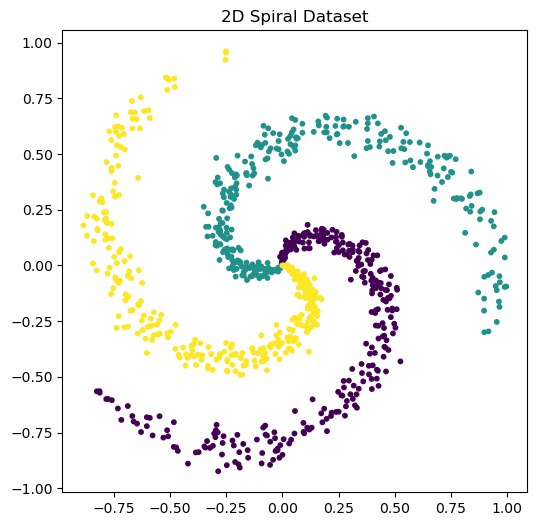

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def make_spiral(n_points=1000, n_classes=3, noise=0.2):
    X = np.zeros((n_points * n_classes, 2))
    y = np.zeros(n_points * n_classes, dtype='uint8')

    for j in range(n_classes):
        ix = range(n_points * j, n_points * (j + 1))
        r = np.linspace(0.0, 1, n_points)  # radius
        t = np.linspace(j * 4, (j + 1) * 4, n_points) + np.random.randn(n_points) * noise
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        y[ix] = j

    return X, y

# Generate data
X, y = make_spiral(n_points=300, n_classes=3)

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap="viridis")
plt.title("2D Spiral Dataset")
plt.show()


In [4]:
from scratch.nn.linear import Linear
from scratch.nn.activations import ReLU, Sigmoid
from scratch.nn.sequential import Sequential
from scratch.nn.loss import Loss
from scratch.nn.optim import Adam
from scratch.trainer import Trainer
from scratch.tensor import Tensor

model = Sequential(
    Linear(2, 16),
    ReLU(),
    Linear(16, 16),
    ReLU(),
    Linear(16, 3),  # 3 output classes
    # Softmax is NOT here! CrossEntropy will do softmax internally.
)


opt = Adam(model.parameters(), lr=0.01)
loss = Loss.cross_entropy


In [5]:
dataloader = []
for xi, yi in zip(X, y):
    x = Tensor(xi.reshape(1, 2), requires_grad=False)
    t = int(yi)   # NOT a Tensor
    dataloader.append((x, t))


In [6]:
trainer = Trainer(model, opt, loss)
trainer.fit(dataloader, epochs=2000)


2025-11-19 20:43:09.858 | INFO     | scratch.trainer:fit:20 - Training model for 6 parameters for 2000 epochs
Epochs: 100%|██████████| 2000/2000 [10:41<00:00,  3.12it/s]
2025-11-19 20:53:51.354 | INFO     | scratch.trainer:fit:47 - Training time: 641.50 seconds


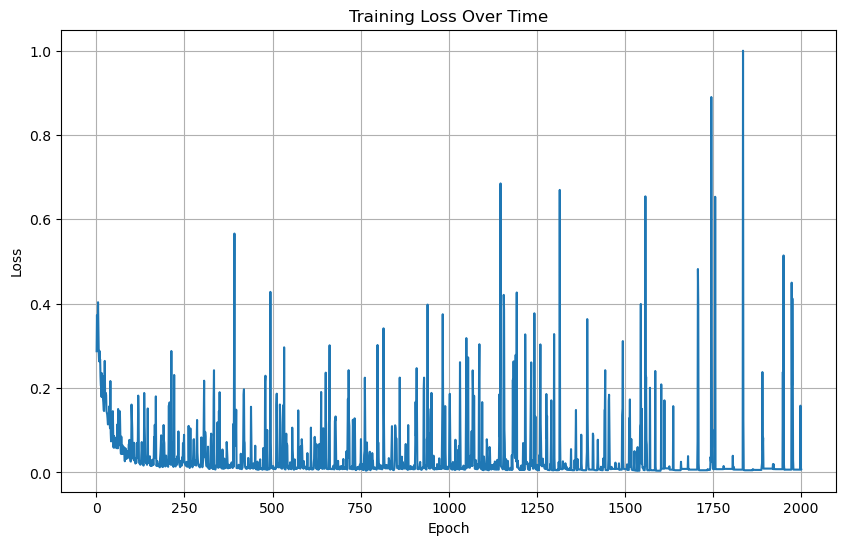

In [7]:
from scratch.utils import plot_history
plot_history(trainer.history)
